In [1]:
import os
import pandas as pd

data_dir = "round-1-island-data-bottle"
df_dict = {}

for filename in os.listdir(data_dir):
    if "nn" in filename:
        print(f"Reading {filename}...")
        df_dict[filename] = pd.read_csv(os.path.join(data_dir, filename), delimiter=";")

Reading trades_round_1_day_-1_nn.csv...
Reading trades_round_1_day_-2_nn.csv...
Reading trades_round_1_day_0_nn.csv...


<Axes: xlabel='timestamp'>

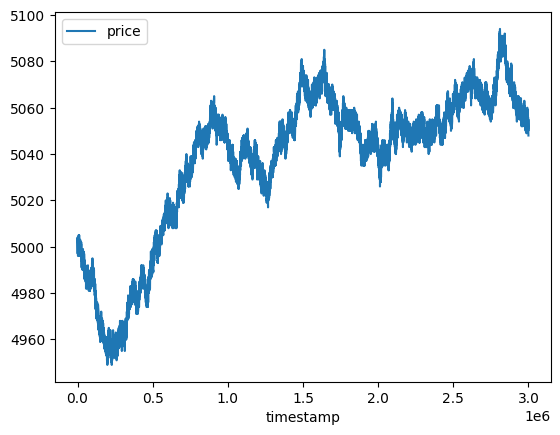

In [2]:
filenames = ["trades_round_1_day_-2_nn.csv", "trades_round_1_day_-1_nn.csv", "trades_round_1_day_0_nn.csv"]

starfruit_df = None

for idx, filename in enumerate(filenames):
    df = df_dict[filename]

    if starfruit_df is None:
        starfruit_df = df
    else:
        df["timestamp"] = df["timestamp"] + (idx * 1000000)
        starfruit_df = pd.concat([starfruit_df, df], ignore_index=True)

starfruit_df = starfruit_df[starfruit_df["symbol"] == "STARFRUIT"]
starfruit_df.plot(x="timestamp", y="price")

In [13]:
from sklearn.linear_model import LinearRegression
print(f"Number of rows: {len(starfruit_df.index)}")

starfruit_prices = pd.Series(starfruit_df["price"].values, index=starfruit_df["timestamp"])
X = [list(window) for window in starfruit_prices.rolling(window=5)][4:] # Discord first 4
y = [window[-1] for window in X]

X = [window[:-1] for window in X] # Remove last element

# y = a * x_0 + b * x_1 + c * x_2 + d * x_3 + e
reg = LinearRegression().fit(X, y)
print(f"R^2 score: {reg.score(X, y)}")
print(f"Coefficients: {reg.coef_}, intercept: {reg.intercept_}")

print(X[0][0] * reg.coef_[0] + X[0][1] * reg.coef_[1] + X[0][2] * reg.coef_[2] + X[0][3] * reg.coef_[3])
print(y[0])

Number of rows: 8915
R^2 score: 0.9905584776218741
Coefficients: [0.19276398 0.22111366 0.24350053 0.34038018], intercept: 11.302935408693884
4989.476847296161
4997.0


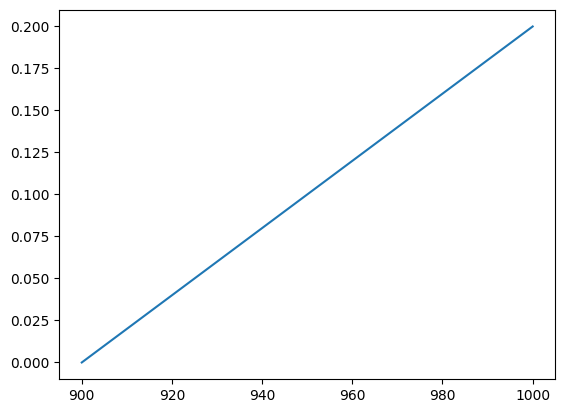

In [3]:
import matplotlib.pyplot as plt
import scipy.stats as st

class linear_pmf(st.rv_discrete):
    def _pmf(self, x):
        return 0.002*x - 1.8 # Normalized over its range, in this case [0,1]

goldfish_pmf = linear_pmf(a=900, b=1000)

xs = np.arange(900, 1001)
plt.plot(xs, goldfish_pmf.pmf(xs))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101/101 [24:39<00:00, 14.64s/it]


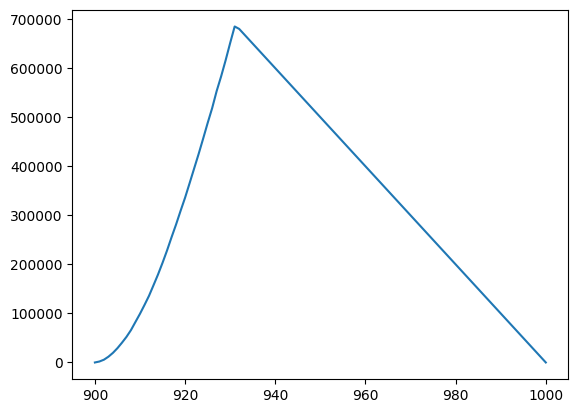

In [8]:
from tqdm import tqdm

bids = np.arange(900, 1001)
expected_profits = []
num_goldfish = 10000
num_experiments = 10

for bid in tqdm(bids):
    expected_profit = 0
    
    # Run the experiment 10 times each
    for _ in range(num_experiments):
        reserve_prices = goldfish_pmf.rvs(size=num_goldfish)
        profits = [1000 - bid if bid >= price else 0 for price in reserve_prices]
        expected_profit += sum(profits)

    expected_profits.append(expected_profit / num_experiments)

plt.plot(bids, expected_profits)

In [15]:
print(expected_profits)
print(f"Bid with highest expected profits: {bids[np.argmax(expected_profits)]}")
print(f"Highest expected profits: {max(expected_profits)}")

[0.0, 1970.1, 5635.0, 11766.1, 19593.6, 29155.5, 40260.2, 52173.0, 66000.8, 82700.8, 99279.0, 117230.8, 135889.6, 157470.0, 179404.6, 203150.0, 228303.6, 255299.7, 281268.2, 309055.5, 335960.0, 365375.0, 395163.6, 424878.3, 456083.6, 487935.0, 518310.8, 553215.9, 583416.0, 616308.4, 651308.0, 684976.8, 680000.0, 670000.0, 660000.0, 650000.0, 640000.0, 630000.0, 620000.0, 610000.0, 600000.0, 590000.0, 580000.0, 570000.0, 560000.0, 550000.0, 540000.0, 530000.0, 520000.0, 510000.0, 500000.0, 490000.0, 480000.0, 470000.0, 460000.0, 450000.0, 440000.0, 430000.0, 420000.0, 410000.0, 400000.0, 390000.0, 380000.0, 370000.0, 360000.0, 350000.0, 340000.0, 330000.0, 320000.0, 310000.0, 300000.0, 290000.0, 280000.0, 270000.0, 260000.0, 250000.0, 240000.0, 230000.0, 220000.0, 210000.0, 200000.0, 190000.0, 180000.0, 170000.0, 160000.0, 150000.0, 140000.0, 130000.0, 120000.0, 110000.0, 100000.0, 90000.0, 80000.0, 70000.0, 60000.0, 50000.0, 40000.0, 30000.0, 20000.0, 10000.0, 0.0]
Bid with highest exp